In [3]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

dataPath = "english_15/"

vocabulary = open(dataPath + "vocabulary.txt").read().splitlines()

neutral_topic_mean = np.load(dataPath +"neutral_topic_mean.npy")
negative_topic_mean = np.load(dataPath +"negative_topic_mean.npy")
positive_topic_mean = np.load(dataPath +"positive_topic_mean.npy")
authors = pd.read_csv(dataPath +"authors.csv")
authors["name"]


os.path.join(os.path.dirname('.'), os.pardir)
decoder = pd.read_csv(os.path.join(os.path.join(os.path.dirname('.'), os.pardir), "data\\paradigms\\clean\\id_name_para.csv"), index_col=0)['Judge Name']
neutral_topic_mean.shape


(15, 14052)

In [4]:
# @title Run this cell to create helper function for printing topics


def get_topics(
    neutral_mean, negative_mean, positive_mean, vocabulary, print_to_terminal=True
):
    num_topics, num_words = neutral_mean.shape
    words_per_topic = 10
    top_neutral_words = np.argsort(-neutral_mean, axis=1)
    top_negative_words = np.argsort(-negative_mean, axis=1)
    top_positive_words = np.argsort(-positive_mean, axis=1)
    topic_strings = []
    for topic_idx in range(num_topics):
        neutral_start_string = "Neutral  {}:".format(topic_idx)
        neutral_row = [
            vocabulary[word] for word in top_neutral_words[topic_idx, :words_per_topic]
        ]
        neutral_row_string = ", ".join(neutral_row)
        neutral_string = " ".join([neutral_start_string, neutral_row_string])

        positive_start_string = "Positive {}:".format(topic_idx)
        positive_row = [
            vocabulary[word] for word in top_positive_words[topic_idx, :words_per_topic]
        ]
        positive_row_string = ", ".join(positive_row)
        positive_string = " ".join([positive_start_string, positive_row_string])

        negative_start_string = "Negative {}:".format(topic_idx)
        negative_row = [
            vocabulary[word] for word in top_negative_words[topic_idx, :words_per_topic]
        ]
        negative_row_string = ", ".join(negative_row)
        negative_string = " ".join([negative_start_string, negative_row_string])

        if print_to_terminal:
            topic_strings.append(negative_string)
            topic_strings.append(neutral_string)
            topic_strings.append(positive_string)
            topic_strings.append("==========")
        else:
            topic_strings.append(
                "  \n".join([negative_string, neutral_string, positive_string])
            )

    if print_to_terminal:
        all_topics = "{}\n".format(np.array(topic_strings))
    else:
        all_topics = np.array(topic_strings)
    return all_topics

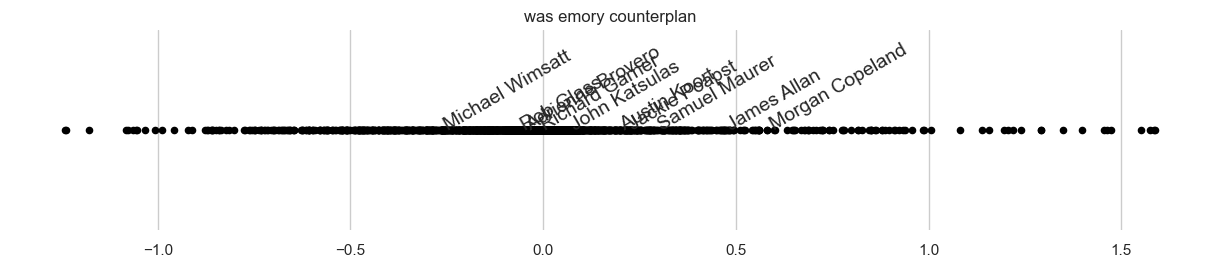

In [18]:
selected_authors = np.array(
    [
        "Rob Glass",
        "James Allan",
        "Michael Wimsatt",
        "Richard Garner",
        "Austin Koort",
        "Adrienne Brovero",
        "Morgan Copeland",
        "John Katsulas",
        "Samuel Maurer",
        "Jackie Poapst"
    ]
)

sns.set(style="whitegrid")
fig = plt.figure(figsize=(12, 2))
ax = plt.axes([0, 0, 1, 1], frameon=False)
ax.set_title('was emory counterplan')
for index in range(authors.shape[0]):
    ax.scatter(authors["ideal_point_4"][index], 0, c="black", s=20)
    if decoder[authors["name"][index]] in selected_authors:
        ax.annotate(
            decoder[authors["name"][index]],
            xy=(authors["ideal_point_4"][index], 0.0),
            xytext=(authors["ideal_point_4"][index], 0),
            rotation=30,
            size=14,
        )
ax.set_yticks([])
plt.show()



In [6]:
authors_c = authors.drop('Unnamed: 0', axis=1)
authors_c.sort_values('ideal_point_5', inplace=True)
authors_c.rename({'name':'Judge ID'}, axis=1, inplace=True)
authors_c.set_index('Judge ID', inplace=True)
authors_c = authors_c.merge(decoder, on='Judge ID')
authors_c.head()

ideal_point_0  ideal_point_1  ideal_point_2  ideal_point_3  \
Judge ID                                                               
11643          0.020736      -0.078359      -0.018228      -0.234762   
2151           0.007360       0.247196       0.183199      -0.290237   
6734          -0.090127       0.171055       0.094768      -0.122206   
6530          -0.339260       0.167315       0.009253       0.082313   
6263          -0.045043      -0.036529       0.007695      -0.005397   

          ideal_point_4  ideal_point_5  ideal_point_6  ideal_point_7  \
Judge ID                                                               
11643          0.002568      -1.186856       0.029581      -0.829216   
2151          -0.050035      -0.922792      -0.057474      -0.162738   
6734          -0.069837      -0.848408       0.036684       0.028422   
6530          -0.022233      -0.801877       0.085170       0.561989   
6263           0.058851      -0.782525       0.326138      -0.124709   

          ideal_point_8  ideal_point_9  ideal_point_10  ideal_point_11  \
Judge ID                                                                 
11643         -0.765440       0.095853        0.014947        0.242694   
2151          -0.407755      -0.522195        0.055405       -0.320398   
6734           0.024151      -0.366238       -0.550423        0.231538   
6530           0.183479       0.285683        0.091749       -0.211240   
6263          -0.038979       0.004748        0.654069        0.086312   

          ideal_point_12  ideal_point_13  ideal_point_14   Judge Name  
Judge ID                                                               
11643           0.576331        0.086189       -0.164975     Jake Lee  
2151           -0.191609       -0.205232        1.580745  John Lawson  
6734            0.137229       -0.038936       -0.030110  Joe Patrice  
6530           -0.030312        1.265576       -0.009265   Joe Schatz  
6263            0.464862        0.057146        0.065015  Alex Pappas

In [20]:
authors_c.sort_values('ideal_point_4', inplace=True, ascending=True)

authors_c.head(20)


#print(authors_c.min()[:-1].mean(), authors_c.max()[:-1].mean())



ideal_point_0  ideal_point_1  ideal_point_2  ideal_point_3  \
Judge ID                                                               
6519          -0.026313       0.415937       0.071249      -0.043307   
6357           0.018486       0.091804      -0.027236      -0.097313   
33444          0.071447       0.199719      -0.329405      -0.099730   
38337         -0.000881      -0.067670       0.419115      -0.045281   
14342         -0.004927      -0.028734      -0.444246      -0.028683   
21825         -0.005532       0.370570      -0.026172      -0.291466   
33909          0.008776       0.190931      -0.092329       0.029726   
10316         -0.029118       0.354557      -0.043773      -0.106838   
33931          0.002365       0.034332      -0.234799       0.015818   
10238         -0.000598       0.164165      -0.330265      -0.005664   
7274           0.022636       0.517508      -0.211169       0.062327   
12034          0.008595      -0.044838       0.112111      -0.292331   
7459          -0.006844       1.410661      -0.028235       0.053291   
8382          -0.006957      -0.015818       0.079019       0.153793   
11257         -0.023455       0.519409      -0.237804      -0.124456   
12168          0.015605       0.416661       0.035059       0.089015   
7989           0.010037       0.065014       0.061072       0.066298   
7432          -0.029930       0.442776      -0.200051      -0.037208   
8006           0.033588      -0.087300       0.211873      -0.324338   
6528           0.012787       0.130894      -0.262710       0.039905   

          ideal_point_4  ideal_point_5  ideal_point_6  ideal_point_7  \
Judge ID                                                               
6519          -1.241814       0.278839       0.011128       0.064824   
6357          -1.238621       0.054587      -0.007577       0.062599   
33444         -1.178840      -0.107846       0.090393      -0.000421   
38337         -1.082283      -0.064988       0.014711      -0.008861   
14342         -1.076602      -0.006171       0.007150       0.055490   
21825         -1.064847      -0.431058       0.018695      -0.001299   
33909         -1.057640      -0.056483       0.050784      -0.078939   
10316         -1.053031      -0.039353      -0.088831       0.038390   
33931         -1.034192      -0.011862       0.018975      -0.006476   
10238         -1.006390      -0.046395      -0.010227       0.129545   
7274          -0.989238      -0.082081       0.209088       0.101731   
12034         -0.957058       0.089832       0.304210      -0.049675   
7459          -0.921905      -0.015870       0.055041      -0.001766   
8382          -0.911944       0.667043       0.015642      -0.127115   
11257         -0.878057       0.045608       0.021708      -0.014269   
12168         -0.872467      -0.376465      -0.017904      -0.304164   
7989          -0.869611      -0.026533      -0.002016      -0.060788   
7432          -0.862835      -0.014942       0.003170       0.023516   
8006          -0.859493       0.003910      -0.033886      -0.005958   
6528          -0.859044       0.842120       0.061846      -0.016240   

          ideal_point_8  ideal_point_9  ideal_point_10  ideal_point_11  \
Judge ID                                                                 
6519          -0.171950       0.263103        0.065082        0.372737   
6357           0.037743      -0.202686        0.026017        0.158772   
33444         -0.799570       0.271713        0.040722        0.350091   
38337         -0.017109      -0.344201        0.083121        0.515517   
14342         -0.269155      -0.038160       -0.018353        0.047283   
21825         -0.088921       0.428993        0.069943       -0.283280   
33909         -0.028089       0.007729       -0.017752        0.255763   
10316         -0.270936       0.092562        0.014817       -0.000159   
33931         -0.012967       0.062905        0.072803        0.037457   
10238         -0.202633   

In [10]:

topics = get_topics(neutral_topic_mean, positive_topic_mean, negative_topic_mean, vocabulary)
topics

"['Negative 0: yes, state, society, activism, identity, question, educational, answer, critical, positions'\n 'Neutral  0: critical, state, identity, speeches, question, topical, answer, yes, ideas, winning'\n 'Positive 0: critical, speeches, topical, law, cx, face, winning, state, ideas, question'\n '=========='\n 'Negative 1: affirmative, negative, believe, resolution, presumption, change, affirmatives, likely, state, prove'\n 'Neutral  1: affirmative, negative, affirmatives, believe, defend, resolution, counterplans, kritiks, alternative, interpretation'\n 'Positive 1: kritiks, counterplans, affirmative, kritik, disads, negative, disad, interpretation, topical, affirmatives'\n '=========='\n 'Negative 2: run, speed, tell, slow, make sure, long, running, debater, fun, fine'\n 'Neutral  2: speed, run, tell, slow, long, make sure, ask, debater, running, open'\n 'Positive 2: rules, speed, parli, position, tell, pf, ask, advocacy, opponent, believe'\n '=========='\n 'Negative 3: arg, arg

In [11]:
K = neutral_topic_mean.shape[0]
neutral_topic_mean.shape

(15, 14052)

In [12]:
from wordcloud import WordCloud #type: ignore

In [13]:
authors_c.drop("Judge Name", axis=1).abs().mean().max()

0.22736376236662362

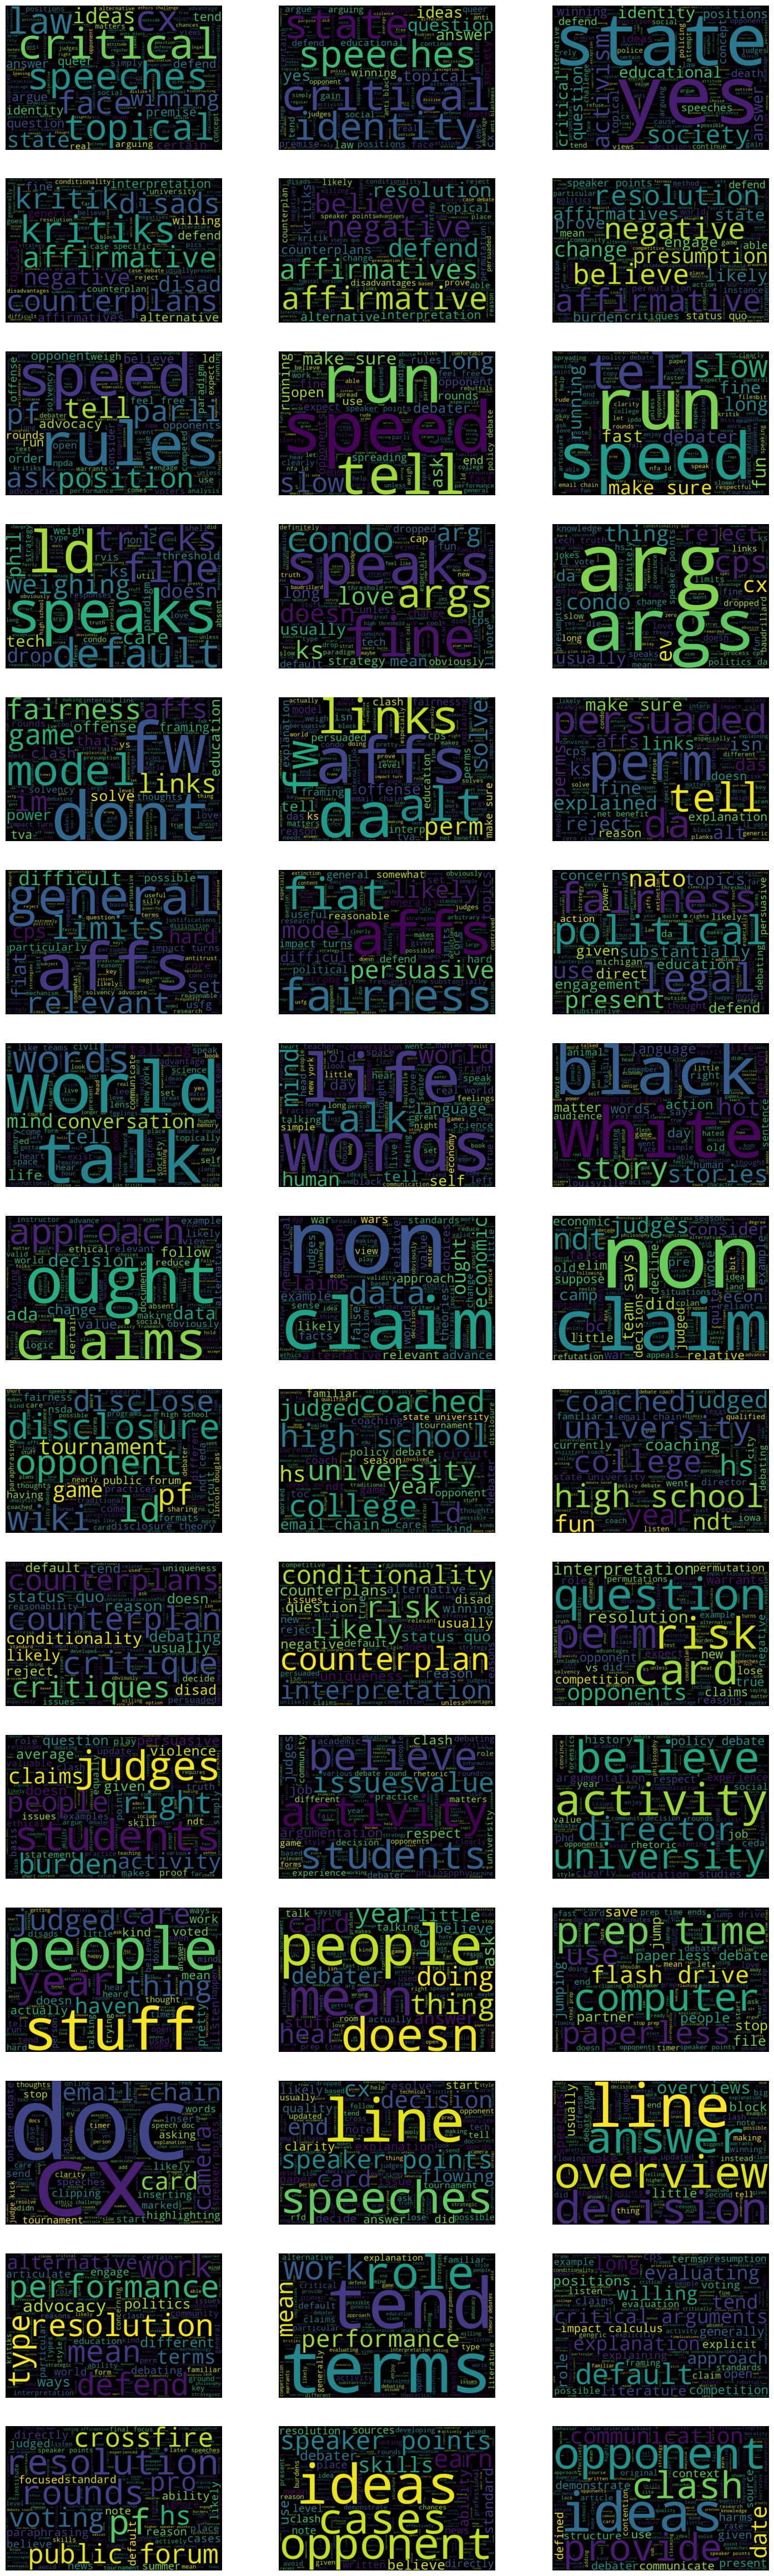

In [14]:
means_list = [negative_topic_mean, neutral_topic_mean, positive_topic_mean]
px = 1/plt.rcParams['figure.dpi']
fig, axes = plt.subplots(K,3, figsize=(600*3*px,K*400*px))
for i, row in enumerate(axes):
    for j, ax in enumerate(row):
        word_freq = dict(zip(vocabulary, means_list[j][i,:]))
        wordcloud = WordCloud(width=600, height=400).generate_from_frequencies(word_freq)
        ax.imshow(wordcloud, interpolation='bilinear')
        ax.axis('off')
        


In [15]:
authors.head()

Unnamed: 0  name  ideal_point_0  ideal_point_1  ideal_point_2  \
0           0     1      -0.050997      -0.133024       0.615976   
1           1     3       0.006533      -0.087051       0.024073   
2           2   319       0.005361       0.027679       0.199856   
3           3  1057      -0.018844       0.208606       0.062497   
4           4  1088       0.005559      -0.030267      -0.067766   

   ideal_point_3  ideal_point_4  ideal_point_5  ideal_point_6  ideal_point_7  \
0       0.573841       0.075743      -0.022422       0.009104      -0.057790   
1       0.034604       0.011607       0.236780       0.062185       0.081574   
2       0.223015      -0.145845      -0.057601      -0.062798       0.007745   
3       0.224586      -0.010175      -0.516101      -1.233483       0.008184   
4      -0.008667       0.050105      -0.016623       0.015820      -0.007364   

   ideal_point_8  ideal_point_9  ideal_point_10  ideal_point_11  \
0       0.537308      -0.206025       -0.049513       -0.042821   
1      -0.272908       0.166545       -0.314256        0.289249   
2       0.033358      -0.011878       -0.010750        0.176347   
3      -0.101053       0.267912        0.202851        0.028950   
4      -1.205321      -0.009065       -0.059227        1.624861   

   ideal_point_12  ideal_point_13  ideal_point_14  
0        0.540404        0.147655        0.433016  
1        0.018378       -0.262107        0.048129  
2       -0.127878        0.082845        0.174857  
3        0.166537        0.152696       -0.095054  
4       -0.087710        0.040071        0.152772